In [2]:
import pandas as pd
import random
import numpy as np
import math
import matplotlib.pyplot as plt

file_path = 'data.csv'
df = pd.read_csv(file_path,header=None)

points = df.values 

In [3]:
def initialize(k):
    clusters = [[] for _ in range(k)]

    random_pnts = random.sample(range(0, len(points)), k)

    for i in range(k):
        clusters[i].append(points[random_pnts[i]])

    remaining = []

    for i in range(len(points)):
        if i not in random_pnts:
            remaining.append(i)

    for ii in remaining:
        kk = 0
        for j in range(k):
            if math.dist(points[ii],points[random_pnts[j]]) < math.dist(points[ii],points[random_pnts[kk]]):
                kk=j
        clusters[kk].append(points[ii])
    
    return clusters

In [4]:
def check_2(clusters, error_list):
    change = [[] for _ in range(2)]
    change_to = [[] for _ in range(2)]
    stays = [[] for _ in range(2)]
    flag = 0
    for clus_num in range(2):
        for clus_ind in range(len(clusters[clus_num])):
            gg = clus_num
            for clus_mean in range(2):
                if math.dist(clusters[clus_num][clus_ind],np.mean(clusters[clus_mean], axis =0)) < math.dist(clusters[clus_num][clus_ind],np.mean(clusters[gg], axis = 0)):
                    gg = clus_mean
            
            if gg!=clus_num:
                flag = 1
                change[clus_num].append(clus_ind)
                change_to[clus_num].append(gg)

    if flag == 0:
        return None
    
    for i in range(2):
        for ii in range(len(clusters[i])):
            if ii not in change[i]:
                stays[i].append(clusters[i][ii])

    
    for i in range(2):
        for ii in range(len(change[i])):
            stays[change_to[i][ii]].append(clusters[i][change[i][ii]])

    error = 0
    for i in range(2):
        meann = np.mean(stays[i], axis =0)
        for ii in range(len(stays[i])):
            error+=math.dist(stays[i][ii],meann)**2

    error_list.append(error)

    return stays

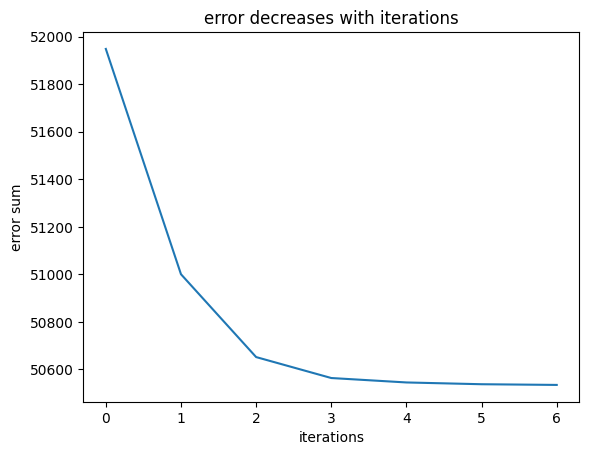

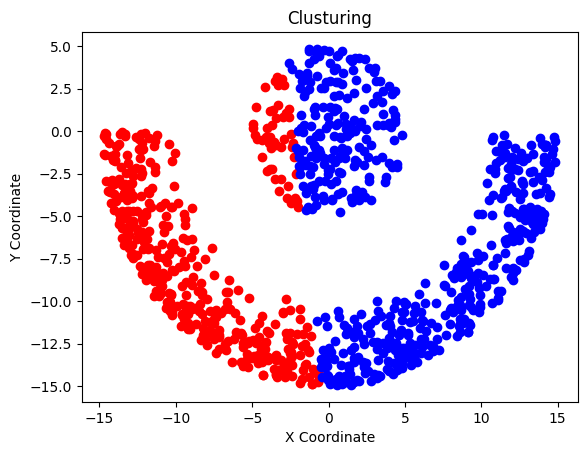

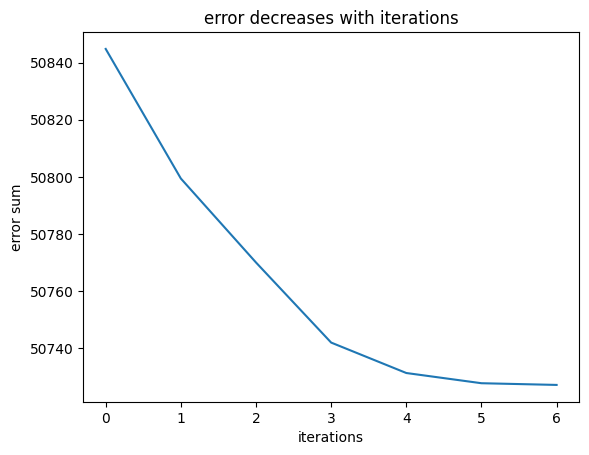

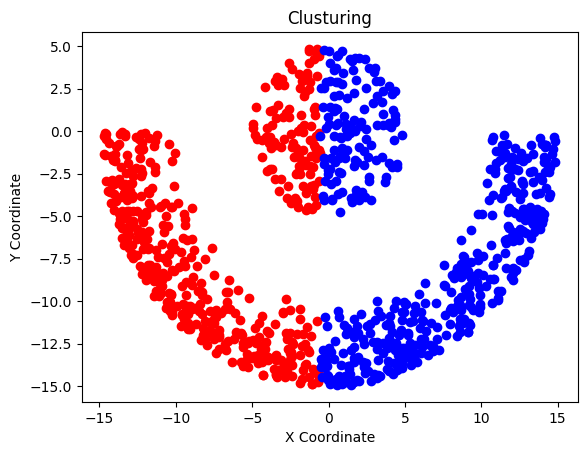

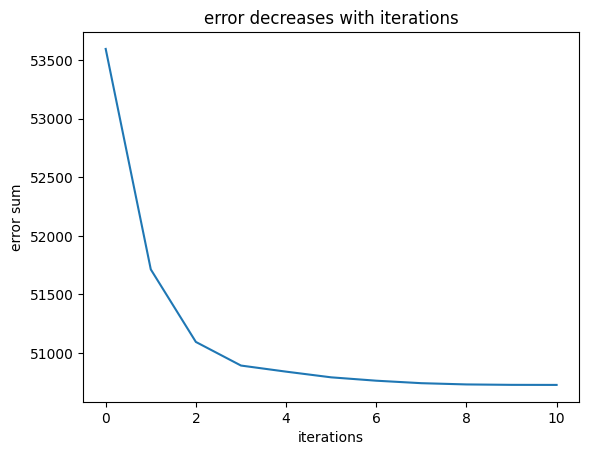

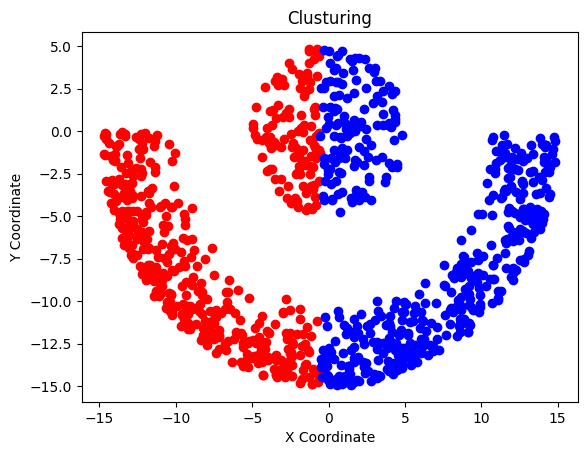

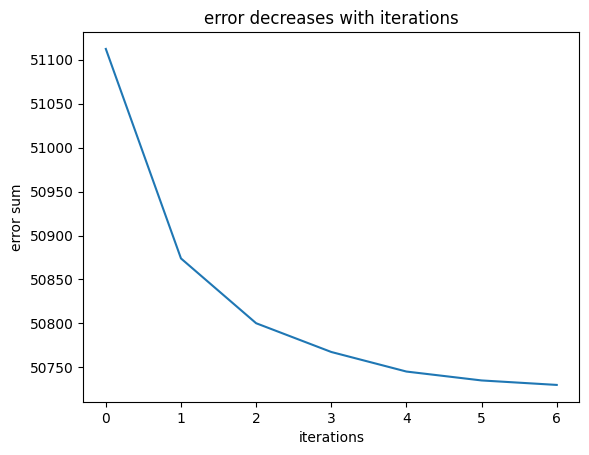

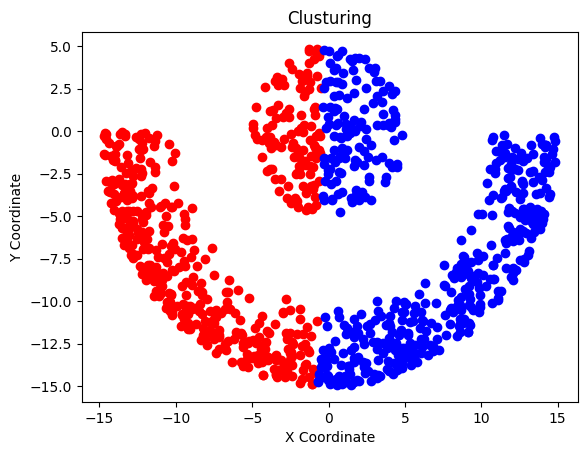

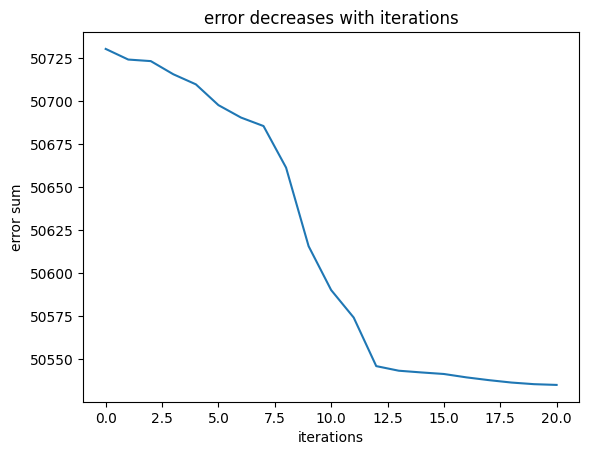

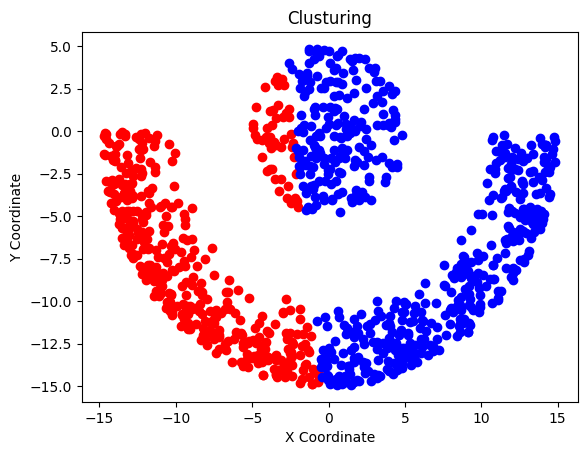

In [5]:
for i in range(5):
    k = 2
    clusters = initialize(k)

    count = 0
    gg = clusters
    error_list=[]

    while 1:
        gk = check_2(gg,error_list)
        count+=1
        if gk == None:
            break
        gg = gk

    # print(count)

    plt.plot(error_list)

    plt.xlabel('iterations')
    plt.ylabel('error sum')
    plt.title('error decreases with iterations')
    plt.show()

    colors = ['red', 'blue', 'green','pink','orange','purple','yellow','violet','brown','black']

    for i in range(2):
        plt.scatter(np.array(gg[i])[:, 0], np.array(gg[i])[:, 1], color=colors[i])

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Clusturing')

    plt.show()

In [6]:
def check_k(clusters,k):
    change = [[] for _ in range(k)]
    change_to = [[] for _ in range(k)]
    stays = [[] for _ in range(k)]
    flag = 0
    for clus_num in range(k):
        for clus_ind in range(len(clusters[clus_num])):
            gg = clus_num
            for clus_mean in range(k):
                if math.dist(clusters[clus_num][clus_ind],np.mean(clusters[clus_mean], axis =0)) < math.dist(clusters[clus_num][clus_ind],np.mean(clusters[gg], axis = 0)):
                    gg = clus_mean
            
            if gg!=clus_num:
                flag = 1
                change[clus_num].append(clus_ind)
                change_to[clus_num].append(gg)

    if flag == 0:
        return None
    
    for i in range(k):
        for ii in range(len(clusters[i])):
            if ii not in change[i]:
                stays[i].append(clusters[i][ii])

    
    for i in range(k):
        for ii in range(len(change[i])):
            stays[change_to[i][ii]].append(clusters[i][change[i][ii]])

    return stays

In [7]:
from scipy.spatial import Voronoi, voronoi_plot_2d
def print_clusters(k):

    clusters = initialize(k)
    gg = clusters

    while 1:
        gk = check_k(gg,k)
        if gk == None:
            break
        gg = gk

    colors = ['red', 'blue', 'green','pink','orange','purple','yellow','violet','brown','black']

    for i in range(k):
        plt.scatter(np.array(gg[i])[:, 0], np.array(gg[i])[:, 1], color=colors[i])

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Clusturing with k = {k}')

    plt.show()

    center_list = []

    for i in range(k):
        center_list.append(np.mean(gg[i], axis=0))

    center_list = np.array(center_list)

    if k > 2:

        vor = Voronoi(center_list)

        voronoi_plot_2d(vor, show_vertices=False, show_points=True)


        plt.plot(center_list[:, 0], center_list[:, 1], 'ro')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('Voronoi Diagram')

        plt.show()
        
    elif k == 2:
            
        slope = (center_list[0][0] - center_list[1][0])/(center_list[1][1] - center_list[0][1])
        mid_x = (center_list[0][0] + center_list[1][0])/2
        mid_y = (center_list[0][1] + center_list[1][1])/2
        perpendicular_y_intercept = mid_y - slope * mid_x
        x_min = min(center_list[1][0],center_list[0][0])
        y_min = min(center_list[1][1],center_list[0][1])
        x_max = max(center_list[1][0],center_list[0][0])
        y_max = max(center_list[1][1],center_list[0][1])
        x_vals = np.linspace(min(center_list[1][0],center_list[0][0]), max(center_list[1][0],center_list[0][0]), 100)
        y_vals = slope * x_vals + perpendicular_y_intercept
        plt.plot(x_vals, y_vals, '--', c='k', label='perpendicular bisector')

        plt.scatter(center_list[:, 0], center_list[:, 1], color='red', label='centroids')

        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Line Plot')
        plt.xlim(x_min,x_max)
        plt.ylim(y_min,y_max)
        plt.axis('equal')
        plt.title('voronoi for only 2 points')
        plt.legend()
        plt.show()


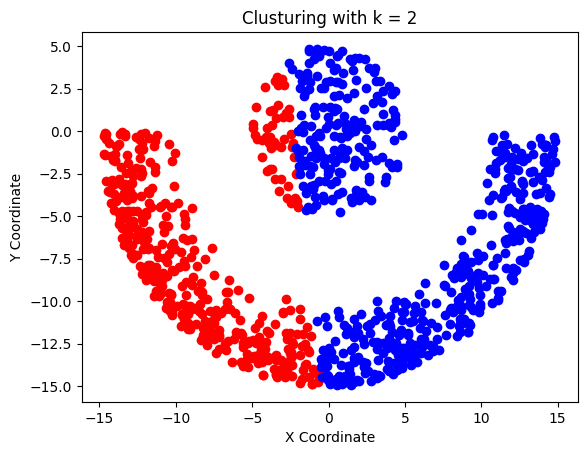

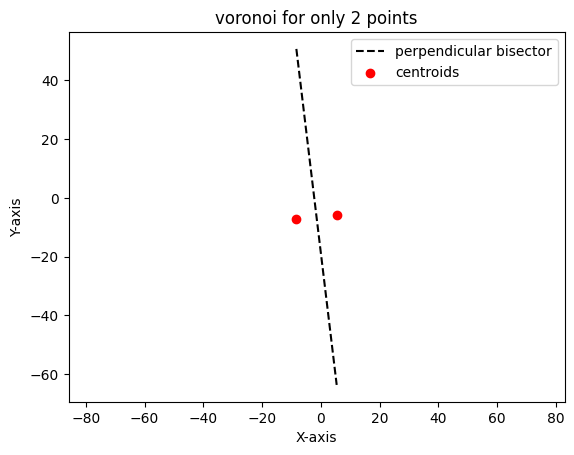

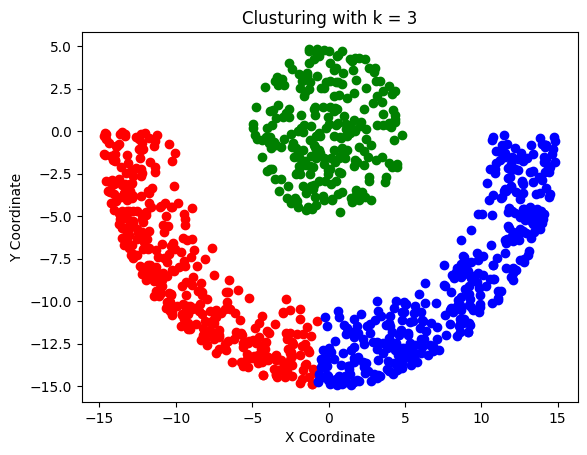

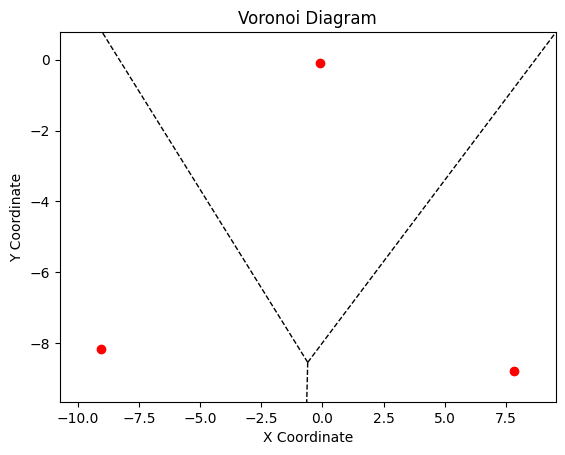

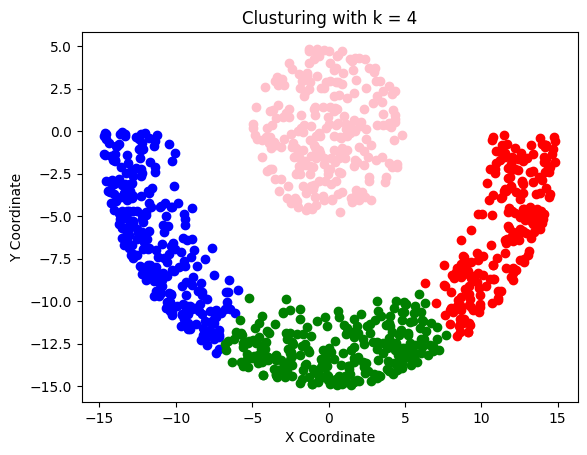

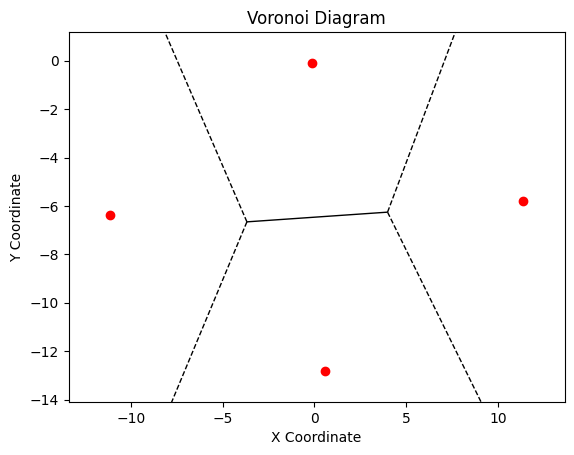

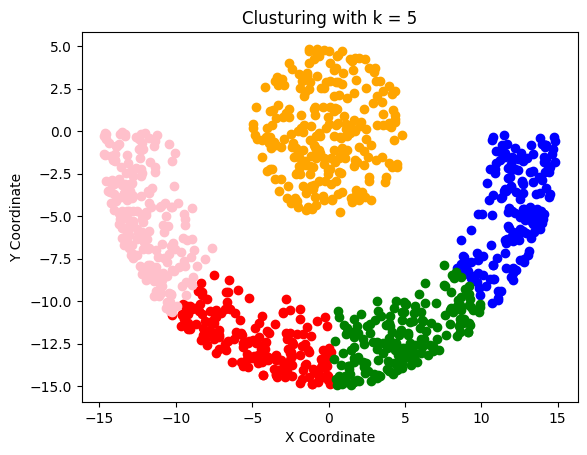

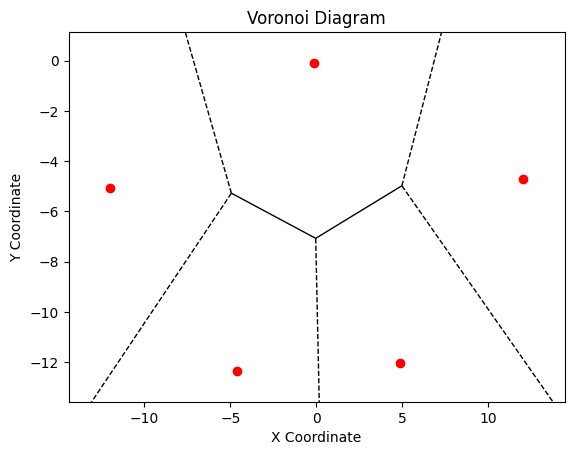

In [8]:
print_clusters(2)
print_clusters(3)
print_clusters(4)
print_clusters(5)


In [9]:
def check_spectral(clusters,k,l_list):

    change = [[] for _ in range(k)]
    change_to = [[] for _ in range(k)]
    stays = [[] for _ in range(k)]
    nl_list = [[] for _ in range(k)]
    flag = 0
    for clus_num in range(k):
        for clus_ind in range(len(clusters[clus_num])):
            gg = clus_num
            for clus_mean in range(k):
                if math.dist(clusters[clus_num][clus_ind],np.mean(clusters[clus_mean], axis =0)) < math.dist(clusters[clus_num][clus_ind],np.mean(clusters[gg], axis = 0)):
                    gg = clus_mean
            
            if gg!=clus_num:
                flag = 1
                change[clus_num].append(clus_ind)
                change_to[clus_num].append(gg)

    if flag == 0:
        return None
    
    for i in range(k):
        for ii in range(len(clusters[i])):
            if ii not in change[i]:
                stays[i].append(clusters[i][ii])
                nl_list[i].append(l_list[i][ii])

    
    for i in range(k):
        for ii in range(len(change[i])):
            stays[change_to[i][ii]].append(clusters[i][change[i][ii]])
            nl_list[change_to[i][ii]].append(l_list[i][change[i][ii]])

    error = 0
    for i in range(k):
        meann = np.mean(stays[i], axis =0)
        for ii in range(len(stays[i])):
            error+=math.dist(stays[i][ii],meann)


    return (stays,nl_list)

In [10]:
def initialize_spectral(k,points,l_list):
    clusters = [[] for _ in range(k)]

    random_pnts = random.sample(range(0, len(points)), k)

    for i in range(k):
        clusters[i].append(points[random_pnts[i]])
        l_list[i].append(random_pnts[i])

    remaining = []

    for i in range(len(points)):
        if i not in random_pnts:
            remaining.append(i)


    for ii in remaining:
        kk = 0
        for j in range(k):
            if math.dist(points[ii],points[random_pnts[j]]) < math.dist(points[ii],points[random_pnts[kk]]):
                kk=j
        clusters[kk].append(points[ii])
        l_list[kk].append(ii)
    
    return clusters

In [11]:
def print_spectral(kernal,k):
    k_eigenvalues, k_eigenvectors = np.linalg.eigh(kernal)

    k_sorted_indices = np.argsort(k_eigenvalues)[::-1]

    k_sorted_eigenvectors = k_eigenvectors[:,k_sorted_indices]

    k_sorted_eigenvalues = np.sort(k_eigenvalues)[::-1]

    A = k_sorted_eigenvectors[:, :k]

    A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)

    l_list = [[] for _ in range(k)]
    clusters = initialize_spectral(k,A_norm,l_list)

    gg = clusters
    hh = l_list

    while 1:
        gk = check_spectral(gg,k,hh)
        if gk == None:
            break
        gg = gk[0]
        hh = gk[1]

    parts = [[] for _ in range(k)]

    for i in range(k):
        for j in range(len(hh[i])):
            parts[i].append(points[hh[i][j]])

    colors = ['red', 'blue', 'green','pink','orange','purple','yellow','violet','brown','black']

    for i in range(k):
        plt.scatter(np.array(parts[i])[:, 0], np.array(parts[i])[:, 1], color=colors[i])

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('seee')

    plt.show()

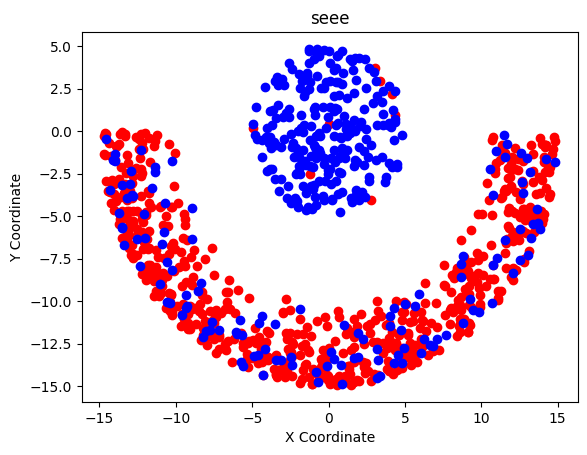

In [12]:
kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((points[i]-points[j]).T),(points[i]-points[j])))/(2*(math.pow(1e11,2))))

print_spectral(kernal,2)

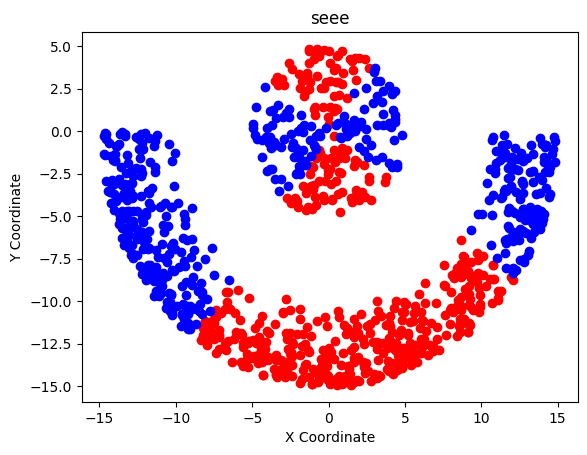

In [17]:
kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=(1+np.dot(points[i].T,points[j]))**2


print_spectral(kernal,2)

In [14]:
def new_spec(k,kernal):

    k_eigenvalues, k_eigenvectors = np.linalg.eigh(kernal)

    k_sorted_indices = np.argsort(k_eigenvalues)[::-1]

    k_sorted_eigenvectors = k_eigenvectors[:,k_sorted_indices]

    k_sorted_eigenvalues = np.sort(k_eigenvalues)[::-1]

    A = k_sorted_eigenvectors[:, :k]

    ass = []

    for i in range(1000):
        ind = 0
        for j in range(k):
            if A[i][j]>A[i][ind]:
                ind = j
        ass.append(ind)

    # print(A)

    cluster_x = [[] for _ in range(k)]
    cluster_y = [[] for _ in range(k)]

    for i in range(1000):
            clus = ass[i]
            cluster_x[clus].append(points[i][0])
            cluster_y[clus].append(points[i][1])

    colors = ['yellow', 'pink', 'green','red','orange']

    for i in range(k):
        plt.scatter(cluster_x[i], cluster_y[i], color=colors[i%5])
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('spectral clusturing')
    plt.show()

    return


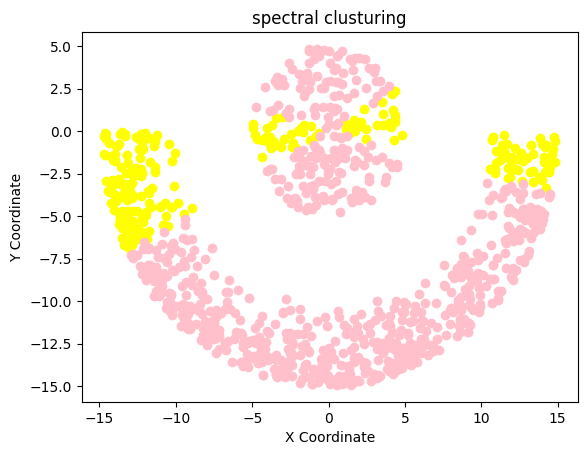

In [15]:
kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=(1+np.dot(points[i].T,points[j]))**2

new_spec(2,kernal)

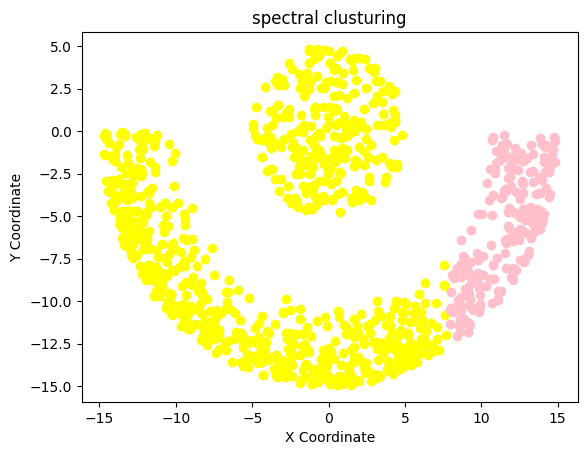

In [16]:
kernal= np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        kernal[i][j]=math.exp(-1*(np.dot(((points[i]-points[j]).T),(points[i]-points[j])))/(2*(math.pow(10000,2))))

new_spec(2,kernal)